In [14]:
import numpy as np
np.random.seed(42)
from sklearn import datasets

### Dataset preparation

In [15]:
iris = datasets.load_iris()

#x = iris.data[:, :2]
#x = iris.data[:, 1:3]
#x = iris.data[:, :3]
#x = iris.data[:, :4]
x = iris.data[:, 2:4]
y = iris.target

class_names = iris.target_names
discription = iris.DESCR

In [16]:
# print(f"class_names:\n{class_names}")
# print(f"discription:\n{discription}")

In [17]:
print(f"x shape:\n{x.shape}")
print(f"y shape:\n{y.shape}")

print(f"x:\n{x}")
print(f"y:\n{y}")

x shape:
(150, 2)
y shape:
(150,)
x:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 

### Dataset Split

In [18]:
num_samples = x.shape[0]
num_features = x.shape[1]
num_classes = y.shape[0]

print(f"num_samples: {num_samples}")
print(f"num_features: {num_features}")
print(f"num_classes: {num_classes}")

num_samples: 150
num_features: 2
num_classes: 150


In [19]:
test_size = num_samples // 3
random_idxs = np.random.permutation(num_samples)

x_train = x[random_idxs[:-test_size]]
y_train = y[random_idxs[:-test_size]]

x_test = x[random_idxs[-test_size:]]
y_test = y[random_idxs[-test_size:]]

In [20]:
print(f"x_train shape:\n{x_train.shape}")
print(f"y_train shape:\n{y_train.shape}")

print(f"x_test shape:\n{x_test.shape}")
print(f"y_test shape:\n{y_test.shape}")

x_train shape:
(100, 2)
y_train shape:
(100,)
x_test shape:
(50, 2)
y_test shape:
(50,)


### KNN Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"accuracy: {accuracy*100.0:.4}%")

y_pred = clf.predict(x_test)
print(f"y_pred:\n{y_pred}")

accuracy: 94.0%
y_pred:
[0 0 0 2 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 2 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]


### Exercise 1: Try different hyperparameters

In [22]:
n_neighbors = [n_neighbor for n_neighbor in range(1,11)] # [1, 2, ..., 10]
weight_modes = ["uniform", "distance"]

# 10 x 2 = 20 Modelle
for n_neighbor in n_neighbors:
    for weight_mode in weight_modes:
        clf = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight_mode)
        clf.fit(x_train, y_train)

        accuracy = clf.score(x_test, y_test)
        print(f"Score for setup: {n_neighbor} Neighbors, {weight_mode} Weight Function - Score: {accuracy:.4}")

Score for setup: 1 Neighbors, uniform Weight Function - Score: 0.94
Score for setup: 1 Neighbors, distance Weight Function - Score: 0.94
Score for setup: 2 Neighbors, uniform Weight Function - Score: 0.96
Score for setup: 2 Neighbors, distance Weight Function - Score: 0.92
Score for setup: 3 Neighbors, uniform Weight Function - Score: 0.94
Score for setup: 3 Neighbors, distance Weight Function - Score: 0.92
Score for setup: 4 Neighbors, uniform Weight Function - Score: 0.98
Score for setup: 4 Neighbors, distance Weight Function - Score: 0.92
Score for setup: 5 Neighbors, uniform Weight Function - Score: 0.98
Score for setup: 5 Neighbors, distance Weight Function - Score: 0.96
Score for setup: 6 Neighbors, uniform Weight Function - Score: 0.98
Score for setup: 6 Neighbors, distance Weight Function - Score: 0.96
Score for setup: 7 Neighbors, uniform Weight Function - Score: 0.98
Score for setup: 7 Neighbors, distance Weight Function - Score: 0.96
Score for setup: 8 Neighbors, uniform Wei

### Exercise 2: Re-train best KNN Model

In [23]:
clf = KNeighborsClassifier(n_neighbors=4, weights="uniform")
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
accuracy = clf.score(x_test, y_test)
print(f"accuracy: {accuracy*100.0:.4}%")

y_pred = clf.predict(x_test)
print(f"y_pred:\n{y_pred}")

print(f"classes:\n{y_test}")

y_pred_proba = clf.predict_proba(x_test)
print(f"y_pred_proba:\n{y_pred_proba}")

accuracy: 98.0%
y_pred:
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]
classes:
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 2 0 1 2]
y_pred_proba:
[[1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.5  0.5 ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.25 0.75]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.5  0.5 ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.

### Decision Border Plot

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_background = ListedColormap([
    '#FFAAAA',
    '#AAAAFF',
    '#AAFFAA'
])
cmap_points = [
    'red',
    'blue', 
    'green'
]

def make_meshgrid(x: np.ndarray, y: np.ndarray):
    x = np.arange(
        np.min(x) - 1, np.max(x) + 1, 0.01
    ) # [4.0, 4.01, 4.02, .... 8.0]
    y = np.arange(
        np.min(y) - 1, np.max(y) + 1, 0.01
    ) # [2.0, 2.01, 2.02, .... 4.5]
    xx, yy = np.meshgrid(x, y)
    return xx, yy

def plot_contours(
    ax: plt.Axes,
    clf: KNeighborsClassifier,
    xx: np.ndarray,
    yy: np.ndarray,
    **params
) -> None:
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = np.reshape(z, (xx.shape))
    ax.contourf(xx, yy, z, **params)

def plot_decision_border(
    clf: KNeighborsClassifier,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray
) -> None:
    fig, ax = plt.subplots()
    X0 = x_train[:, 0]
    X1 = x_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(
        ax, clf, xx, yy, cmap=cmap_background, alpha=0.5
    )
    for idx, point in enumerate(x_train):
        plt.scatter(
            point[0], point[1],
            color=cmap_points[y_train[idx]],
            s=20.0, marker="o"
        )
    for idx, point in enumerate(x_test):
        plt.scatter(
            point[0], point[1],
            color=cmap_points[y_test[idx]],
            s=30.0, marker="*"
        )
    plt.show()

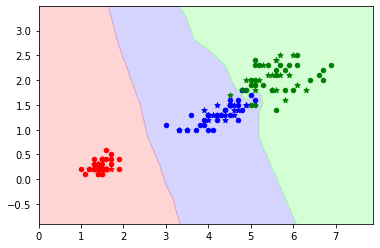

In [26]:
plot_decision_border(clf, x_train, y_train, x_test, y_test)